In [2]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import scipy.stats as stats 
%matplotlib inline

# Практическая проверка работы центральной предельной теоремы

Сгенерируем выборку объёма 1000 из распределения Парето с параметрами xm, k 

In [3]:
# зададим случайную величину с распределением Парето с параметрами xm, k; xm - минимальное значение - по умолчанию = 1
k = 3  # параметр распределения 
rv = stats.pareto(k)
# сгенерируем выборку из 1000 значений этой случайной величины 
rv_samples = rv.rvs(1000)

Построим гистограмму выборки и кривую теоретической плотности распределения поверх неё:

Text(0.5, 0, '$x$')

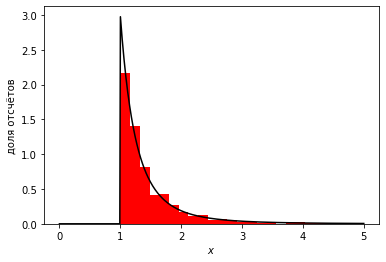

In [4]:
# строим гистограмму 
plt.hist(rv_samples, range=(1,5), bins=25, density=True, color='red') 
# задаём массив аргументов для построения плотности вероятности  
x = np.linspace(0,5,500) 
# строим плотность вероятности 
plt.plot(x, rv.pdf(x), color='black')
# подписываем оси абсцисс и ординат  
plt.ylabel('доля отсчётов'); plt.xlabel('$x$')

# Оценим распределение выборочного среднего случайной величины при разных объёмах выборок. 

Известно, что для распределения Парето с k>1: 
    математическое ожидание (если xm=1):   mu = k/(k-1); 
    дисперсия (квадрат ско) (если xm=1):   ((1/k-1)^2)*(k/k-2)

In [5]:
mu = k/(k-1) 
sigma = (k/(k-1)/(k-1)/(k-2))**0.5
print(mu, sigma)

1.5 0.8660254037844386


Пусть n = 5. Сгенерируем 1000 выборок объёма n, и построим гистограмму распределения выборочных средних значений 

0.4161791450287817
0.38729833462074165


Text(0.5, 0, '$выборочные средние$')

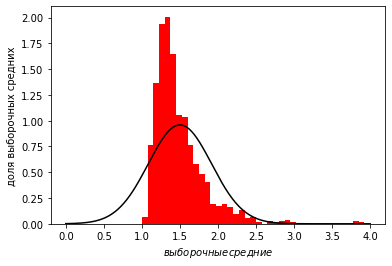

In [7]:
n = 5 
v = [] # заготовим пустой массив для размещения в него выборочных средних

# задаём массив аргументов для построения плотности вероятности  
x = np.linspace(0, 4, 400) 

for i in range(1000):
    samples = rv.rvs(n)
    v.append(sum(samples)/n)

plt.hist(v, range=(1, 4), bins=40, density=True, color='red')
# строим нормальное распределение с параметрами согласно ЦПТ: mu, sigma/n  
gauss = stats.norm(mu, (sigma/n)**0.5)
plt.plot(x, gauss.pdf(x), color='black')
plt.ylabel('доля выборочных средних'); plt.xlabel('$выборочные средние$')

Пусть n = 50. Сгенерируем 1000 выборок объёма n, и построим гистограмму распределения выборочных средних значений 

0.13160740129524925
0.1224744871391589


Text(0.5, 0, '$выборочные средние$')

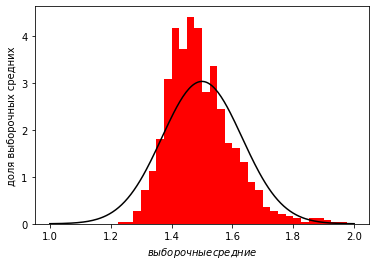

In [8]:
n = 50 
v = [] # заготовим пустой массив для размещения в него выборочных средних

# задаём массив аргументов для построения плотности вероятности  
x = np.linspace(1, 2, 200) 

for i in range(1000):
    samples = rv.rvs(n)
    v.append(sum(samples)/n)

plt.hist(v, range=(1, 2), bins=40, density=True, color='red')
# строим нормальное распределение с параметрами согласно ЦПТ: mu, sigma/n  
gauss = stats.norm(mu, (sigma/n)**0.5)
print((sigma/n)**0.5)
print(sigma/n**0.5)
plt.plot(x, gauss.pdf(x), color='black')
plt.ylabel('доля выборочных средних'); plt.xlabel('$выборочные средние$')

Пусть n = 500. Сгенерируем 1000 выборок объёма n, и построим гистограмму распределения выборочных средних значений 

0.013160740129524924
0.01224744871391589


Text(0.5, 0, '$выборочные средние$')

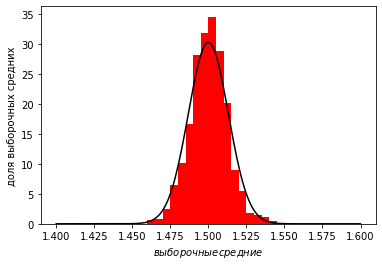

In [9]:
n = 5000 
v = [] # заготовим пустой массив для размещения в него выборочных средних

# задаём массив аргументов для построения плотности вероятности  
x = np.linspace(1.4, 1.6, 200) 

for i in range(1000):
    samples = rv.rvs(n)
    v.append(sum(samples)/n)

plt.hist(v, range=(1.4, 1.6), bins=40, density=True, color='red')
# строим нормальное распределение с параметрами согласно ЦПТ: mu, sigma/n  
gauss = stats.norm(mu, (sigma/n)**0.5)
print((sigma/n)**0.5)
print(sigma/n**0.5)
plt.plot(x, gauss.pdf(x), color='black')
plt.ylabel('доля выборочных средних'); plt.xlabel('$выборочные средние$')

Выводы: 
1. Центральная предельная теорема подтверждена. 
2. По мере увеличения n, аппроксимация распределения выборочных средних нормальным распределением становится всё лучше. 